This is great. I would only suggest importing packages in a different cell/ breaking up the functions, for readability (if you were to move this to a .py function of course you wouldn't do this )

In [1]:
#load packages

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [3]:


# load data
ds = xr.open_dataset('/Users/daneeja/ocean-pytools/assignments/era5.nc').sel(latitude=-34,longitude=18)


# #########################################################
# #### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
# #### (numpy arrays) 
# #### NO XARRAY ALLOWED!
# #########################################################

time = ds.time.values

u10 = ds.u10.values
v10 = ds.v10.values


sensible_heat_flux = ds.msshf.values
latent_heat_flux = ds.mslhf.values
short_wave = ds.msnswrf.values
long_wave = ds.msnlwrf.values
net_heat_flux = (ds.msshf+ds.mslhf+ds.msnswrf+ds.msnlwrf)


[Text(0, 0.5, 'Heat Flux (W m$^{-2}$)')]

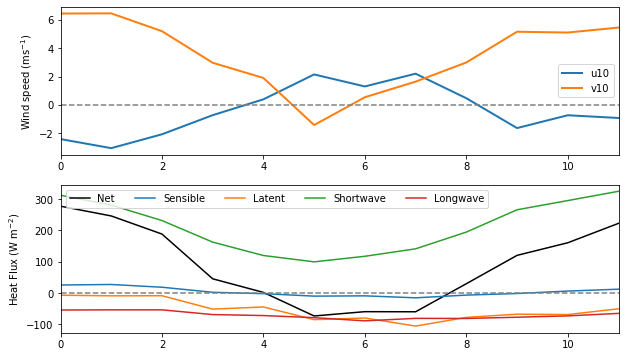

In [4]:

#tsize = u10.shape
tsize1 = len(u10)
t = np.arange(tsize1)     # cant remember if I did this differently, but you could use actual times here by called time

fig, axes = plt.subplots(figsize=(10, 6), nrows=2)
ax0, ax1 = axes
ax0.plot(t, u10, label="u10", linewidth=2)
ax0.plot(t, v10, label="v10", linewidth=2)
ax0.legend(loc="right")
ax0.axhline(y=0, color='0.5', linestyle='--')
ax0.set_xlim([t.min(), t.max()])
#ax0.ylabel('Wind speed')
#ax0.plot(t, u10,ylabel='Wind speed (m s-1)')
plt.setp(ax0, ylabel='Wind speed (ms$^{-1}$)')     # this could also be written as ax0.set_ylabel('')


ax1.plot(t, net_heat_flux, label="Net", color='k')
ax1.plot(t, sensible_heat_flux, label="Sensible")
ax1.plot(t, latent_heat_flux, label="Latent")
ax1.plot(t, short_wave, label="Shortwave")
ax1.plot(t, long_wave, label="Longwave")
ax1.legend(loc="upper left",ncol=5)
ax1.axhline(y=0, color='0.5', linestyle='--')
ax1.set_xlim([t.min(), t.max()])
#ax0.ylabel('Wind speed')
#ax0.plot(t, u10,ylabel='Wind speed (m s-1)')
plt.setp(ax1, ylabel='Heat Flux (W m$^{-2}$)')

To get the dates as months refer to matplotlib tutorial

```
import matplotlib.dates as mdates 
monthFmt = mdates.DateFormatter("%b")    
ax1.xaxis.set_major_formatter(monthFmt) 

```

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec  # only load packages you use 
# %matplotlib inline  # this is the reason you weren't seeing figures the same size 
#(not an issue at all), the figures will save to the size you specify (either via dpi/figsize or both)


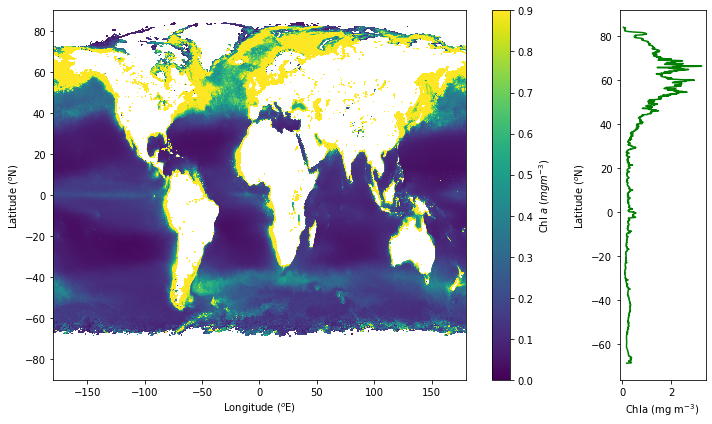

In [5]:

# load data

root_dir = '/Users/daneeja/'  # I just added this so that the code can be run from any directory
root_dir ='../'
ds = xr.open_dataset(root_dir+'ocean-pytools/assignments/chla_clim.nc')
ds = xr.open_dataset(root_dir+'ocean-pytools/assignments/chla_clim.nc')


chla = ds.chlor_a
longitude = ds.lon.values
latitude = ds.lat.values

chla.shape
longitude.shape

cmin=0
cmax=0.9


#fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
#splot = ax[0].pcolor(longitude,latitude,chla,vmin=cmin,vmax=cmax,shading = 'auto')
#plt.setp(ax[0], ylabel='Latitude ($^{o}$)')
#plt.setp(ax[0], xlabel='Longitude ($^{o}$)')
#cbar=fig.colorbar(splot,ax=ax[0],label="Chla ($mg m^{-3}$)")

#g_ymean = chla.mean(axis=1)
#g_ymean.shape
#ax[1].plot(g_ymean,latitude, color='g')
#plt.setp(ax[1], ylabel='Latitude ($^{o}$)')
#plt.setp(ax[1], xlabel='Chla ($mg m^{-3}$)')



fig, ax = plt.subplots(1, 2,figsize=[10,6],gridspec_kw={'width_ratios': [6, 1]})

#fig, ax = plt.subplots(figsize=(18,14),ncols=2)
#gs = gridspec.GridSpec(2,2, hspace=0.25,wspace=0.25,width_ratios =(0.6,0.2,0.2))
#ax1 = fig.add_subplot(gs[0,0])
#ax2 = fig.add_subplot(gs[0,1])
splot = ax[0].pcolor(longitude,latitude,chla,vmin=cmin,vmax=cmax,shading = 'auto')
plt.setp(ax[0], ylabel='Latitude ($^{o}$N)')
plt.setp(ax[0], xlabel='Longitude ($^{o}$E)')
cbar=fig.colorbar(splot,ax=ax[0],label="Chl $\it{a}$ ($mg m^{-3}$)")  # added syntax here to italisize the a

g_ymean = chla.mean(axis=1)
g_ymean.shape
ax[1].plot(g_ymean,latitude, color='g')
plt.setp(ax[1], ylabel='Latitude ($^{o}$N)')
plt.setp(ax[1], xlabel='Chla (mg m$^{-3}$)')

fig.tight_layout()

- It is standard practive to add N, S to degress when referring to lat and lon (I know I didnt do this in my example)
- if you separate the $ signs you can create space in the text 